In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
datasets = tf.keras.datasets.mnist.load_data()

In [3]:
(train_images,train_labels),(test_images,test_labels) = datasets

In [4]:
train_images.shape

(60000, 28, 28)

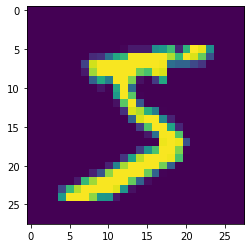

In [5]:
#plt.figure(figsize=(5,3),dpi=100)
plt.imshow(train_images[0])

In [6]:
train_images = np.expand_dims(train_images,axis=-1)
test_images = np.expand_dims(test_images,axis=-1)

In [7]:
train_images.shape

(60000, 28, 28, 1)

In [8]:
train_images = tf.cast(train_images/255,dtype=tf.float32)
test_images = tf.cast(test_images/255,dtype=tf.float32)


In [9]:
train_labels.shape

(60000,)

In [10]:
BATCH_SIZE = 256
BUFFER_SIZE = len(train_images)


In [11]:
data = tf.data.Dataset.from_tensor_slices((train_images,train_labels))
#data = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32)
data = data.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
data

<BatchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.uint8)>

In [12]:
class CnnModel(tf.keras.Model):
    def __init__(self):
        super().__init__()
    def build(self,input_shape):
        self.con_2D_1 = tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape)
        self.con_2D_2 = tf.keras.layers.Conv2D(64,(3,3),activation='relu')
        self.max_pooling_1 = tf.keras.layers.MaxPool2D(pool_size=(2, 2))
        self.con_2D_3 = tf.keras.layers.Conv2D(64,(3,3),activation='relu')
        self.con_2D_4 = tf.keras.layers.Conv2D(64,(3,3),activation='relu')
        self.max_pooling_2 = tf.keras.layers.MaxPool2D(pool_size=(2, 2))
        self.flatten = tf.keras.layers.Flatten()
        self.dense_1 = tf.keras.layers.Dense(256,activation='relu')
        self.dropout = tf.keras.layers.Dropout(0.5)
        self.dense_2 = tf.keras.layers.Dense(10,activation='softmax')
    def call(self,x):
        x = self.con_2D_1(x)
        x = self.con_2D_2(x)
        x = self.max_pooling_1(x)
        x = self.con_2D_3(x)
        x = self.con_2D_4(x)
        x = self.max_pooling_2(x)
        x = self.flatten(x)
        x = self.dense_1(x)
        x = self.dropout(x)
        x = self.dense_2(x)
        
        return (x)
    def summary(self):
        x_input = tf.keras.Input(shape=(28,28,1) )
        output = self.call(x_input)
        model = tf.keras.Model(inputs = x_input,outputs = output)
        model.summary()
        

In [13]:
model = CnnModel()
model.build(input_shape = (28,28,1))
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0     

In [14]:
optimizer = tf.keras.optimizers.Adam()
object_loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

In [15]:
@tf.function
def train_step(images,labels):
    with tf.GradientTape() as tape:
        predictions = model(images)
        losses = object_loss(labels,predictions)
        gradient = tape.gradient(losses,model.trainable_variables)
        optimizer.apply_gradients(zip(gradient,model.trainable_variables))

In [16]:
EPOCHS = 8

In [17]:
def train(dataset,epochs):
    for epoch in range(epochs):
        if epoch %1 == 0:
            print("epoch:{}".format(epoch+1))
        for images,labels in dataset:
            train_step(images,labels)
        
    

In [18]:
train(data,EPOCHS)

epoch:0
epoch:1
epoch:2
epoch:3
epoch:4
epoch:5
epoch:6
epoch:7


In [1]:
import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channels dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [3]:
x_train.shape
y_train.shape

(60000,)

In [4]:
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(10000).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [5]:
train_ds

<BatchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float64, tf.uint8)>

In [6]:
class MyModel(Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = Conv2D(32, 3, activation='relu')
        self.flatten = Flatten()
        self.d1 = Dense(128, activation='relu')
        self.d2 = Dense(10, activation='softmax')

    def call(self, x):
        x = self.conv1(x)
        x = self.flatten(x)
        x = self.d1(x)
        return self.d2(x)

model = MyModel()

In [7]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()

optimizer = tf.keras.optimizers.Adam()

*在循环开始时初始化metrics
*每个batch后更新metrics
*metrics.result()需要显示metrics当前值时调用
*metrics.reset_states()需要清除metrics状态时调用(在每个epoch末尾或者下个epoch开始前）

In [8]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [10]:
@tf.function
def train_step(images, labels):
    with tf.GradientTape() as tape:
        predictions = model(images)
        loss = loss_object(labels, predictions)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        train_loss(loss)
        train_accuracy(labels, predictions)

In [11]:
@tf.function
def test_step(images, labels):
    predictions = model(images)
    t_loss = loss_object(labels, predictions)

    test_loss(t_loss)
    test_accuracy(labels, predictions)

In [30]:
EPOCHS = 5

for epoch in range(EPOCHS):
  # 在下一个epoch开始时，重置评估指标
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()

    for images, labels in train_ds:
        train_step(images, labels)

    for test_images, test_labels in test_ds:
        test_step(test_images, test_labels)

    template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
    print (template.format(epoch+1,
                         train_loss.result(),
                         train_accuracy.result()*100,
                         test_loss.result(),
                         test_accuracy.result()*100))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 1, Loss: 0.1328684389591217, Accuracy: 95.98666381835938, Test Loss: 0.05866504833102226, Test Accuracy: 98.0
Epoch 2, Loss: 0.04084023833274841, Accuracy: 98.70832824707031, Test Loss: 0.049811314791440964, Test Accuracy: 98.25
Epoch 3, Loss: 0.02112184278666973, Accuracy: 99.29999542236328, Test Loss: 0.06252647191286087, Test Accuracy: 98.07999420166016
Epoch 4, Loss: 0.012914084829390049, Accuracy: 99.5566635131836, Test Loss: 0.051522575318813324, Test Accuracy: 98.47999572753906
Epoch 5, Los

In [1]:
import tensorflow as tf

In [4]:
new_model = tf.keras.models.load_model(r'D:\工作目录\lstm_generation_music\weights-20-0.2599.hdf5')

In [5]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 512)          1052672   
_________________________________________________________________
dropout (Dropout)            (None, 100, 512)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 512)          2099200   
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 512)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 512)               2099200   
_________________________________________________________________
dense (Dense)                (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0

In [1]:
import tensorflow as tf

In [4]:
gpus = tf.config.experimental_list_devices()

In [17]:
gpus

['/job:localhost/replica:0/task:0/device:CPU:0',
 '/job:localhost/replica:0/task:0/device:GPU:0']

In [14]:
tf.config.experimental.set_visible_devices(devices=gpu[0:0], device_type='GPU')

NameError: name 'gpu' is not defined